# Task 3 individual - Alyiah Proctor

The first task is to find the trends of covid19 in the last week of data. For this task I will be analyzing the state of Arizona. I will first read in the cases file and group the states

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

cases = pd.read_csv("../../../../data/stage_1/covid_confirmed_usafacts.csv")
cases_grouped = cases.groupby(cases.State)
chunks = dict(list(cases_grouped))
AZ = chunks['AZ']

#deleting the empty state identifier 
AZ = AZ.drop(98)

#getting the last week of data
week =AZ.iloc[: , -7:]
cn = AZ['County Name']
AZ = week
AZ['county'] = cn

#setting id to be county
AZ.set_index('county', inplace=True)
AZ.head()



,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
county,,,,,,,
Apache County,11875,11890,11918,11965,11965,11965,12067
Cochise County,12545,12564,12586,12604,12604,12604,12663
Coconino County,18945,18958,19007,19069,19069,19069,19204
Gila County,7520,7544,7554,7590,7590,7590,7644
Graham County,5750,5756,5781,5792,5792,5792,5838


Now we can plot the data. The easiest way to observe trends is to discuss the mean of the data. As the bar graph shows, there's a slight increase in the mean number of cases throughout Arizona. Because of the scale of our graph is so large, the increase looks small. However based on the actual mean values there is an increase of cases jumping about 200 a day. On the 16th there was a 1000 case jump. 

2021-08-10    63388.400000
2021-08-11    63519.800000
2021-08-12    63719.800000
2021-08-13    63932.733333
2021-08-14    63932.733333
2021-08-15    63932.733333
2021-08-16    64524.133333
Name: mean, dtype: float64


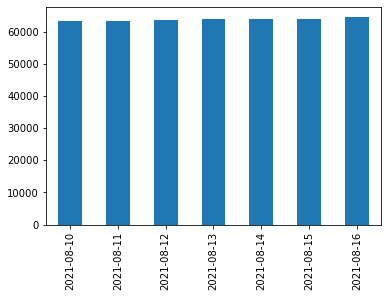

In [2]:
AZ.loc['mean'] = AZ.mean()
AZ.loc['mean'].plot(kind="bar") 
print(AZ.loc['mean'])

## Enrichment Set Merge

I chose to work with the acs demographic data set. Before merging some work was done on the excel sheet itself. The data comes in the form of topic!! subtopic!! specialization. I removed the exclimation marks from those columns. The headers of the table are  codes that reference a metadata file. That excel sheet is  in the data folder, and can be used in the future to  reference column names when needing. 

Task: merging the acs demographic data set with the merged covid 19 set

In [3]:

#reading merged covid data 
merged_covid19 = pd.read_csv("../../../../data/stage_1/merged_covid19.csv")

#reading demographic data
demographic = pd.read_csv("../../../../data/stage_1/acs demographic.csv", header = 1)
demographic.head()

,Estimate Total population,Margin of Error Total population,Percent Total population,Percent Margin of Error Total population,Estimate Total population Male,Margin of Error Total population Male,Percent Total population Male,Percent Margin of Error Total population Male,Estimate Total population Female,Margin of Error Total population Female,...,"Estimate Citizen, 18 and over population Male","Margin of Error Citizen, 18 and over population Male","Percent Citizen, 18 and over population Male","Percent Margin of Error Citizen, 18 and over population Male","Estimate Citizen, 18 and over population Female","Margin of Error Citizen, 18 and over population Female","Percent Citizen, 18 and over population Female","Percent Margin of Error Citizen, 18 and over population Female",id,Geographic Area Name
0,223234,*****,223234,(X),109192,1466,48.9,0.7,114042,1466,...,80874,1076,47.2,0.6,90470,1507,52.8,0.6,0500000US01003,"Baldwin County, Alabama"
1,113605,*****,113605,(X),54285,701,47.8,0.6,59320,701,...,41162,477,46.8,0.4,46710,739,53.2,0.4,0500000US01015,"Calhoun County, Alabama"
2,83768,*****,83768,(X),40579,905,48.4,1.1,43189,905,...,30623,245,48.0,0.6,33195,683,52.0,0.6,0500000US01043,"Cullman County, Alabama"
3,71513,*****,71513,(X),35688,884,49.9,1.2,35825,884,...,24299,850,49.3,1.4,24996,808,50.7,1.4,0500000US01049,"DeKalb County, Alabama"
4,81209,*****,81209,(X),40060,882,49.3,1.1,41149,882,...,29171,741,47.5,0.6,32223,418,52.5,0.6,0500000US01051,"Elmore County, Alabama"


The FIPS code will be used to merge the two sets. Because of this the ID coulmn of the demographic data needs to be reduced to the proper FIPS form of xxxxx. This will be done using a string function that only records the last 5 chars in the string

In [4]:
#creating the index
demographic['id'] = demographic['id'].str[-5:]
demographic[['id','Geographic Area Name']]

,id,Geographic Area Name
0,01003,"Baldwin County, Alabama"
1,01015,"Calhoun County, Alabama"
2,01043,"Cullman County, Alabama"
3,01049,"DeKalb County, Alabama"
4,01051,"Elmore County, Alabama"
...,...,...
835,72113,"Ponce Municipio, Puerto Rico"
836,72127,"San Juan Municipio, Puerto Rico"
837,72135,"Toa Alta Municipio, Puerto Rico"
838,72137,"Toa Baja Municipio, Puerto Rico"


Now we can merge the data. The index of the merged covid 19 table is a combination of the FIPS code and the state abreviation as a string. To merge this with the id we need to merge on the first 5 chars of the string. We also must do a left merge as we need all the data from the covid 19 data set and just the matching counties from the demographic data


In [5]:
covid19_demographic = pd.merge(merged_covid19.add_suffix(""),demographic.add_suffix(""), left_on= merged_covid19['UID'].str[:5], right_on= 'id', how = 'left')
covid19_demographic.head()

,UID,countyFIPS_cases,State_cases,StateFIPS_cases,2020-01-22_cases,2020-01-24_cases,2020-01-26_cases,2020-01-27_cases,2020-01-29_cases,2020-01-31_cases,...,"Estimate Citizen, 18 and over population Male","Margin of Error Citizen, 18 and over population Male","Percent Citizen, 18 and over population Male","Percent Margin of Error Citizen, 18 and over population Male","Estimate Citizen, 18 and over population Female","Margin of Error Citizen, 18 and over population Female","Percent Citizen, 18 and over population Female","Percent Margin of Error Citizen, 18 and over population Female",id,Geographic Area Name
0,01001AL,1001,AL,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01001,NaN
1,01003AL,1003,AL,1,0,0,0,0,0,0,...,80874.0,1076.0,47.2,0.6,90470.0,1507.0,52.8,0.6,01003,"Baldwin County, Alabama"
2,01005AL,1005,AL,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01005,NaN
3,01007AL,1007,AL,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01007,NaN
4,01009AL,1009,AL,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01009,NaN
